### Import Libraries

In [22]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import joblib

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

c:\Users\pedro\anaconda3\envs\churn_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\pedro\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


In [4]:
import os
df = pd.read_csv(os.path.join(path, 'WA_Fn-UseC_-Telco-Customer-Churn.csv'), header=None)

### Pre-Processing

In [5]:
from preprocessing import fillType, prepareData, resampleData

In [6]:
df = fillType(df)

In [7]:
df = resampleData(df)

In [8]:
X, y = prepareData(df)

c:\Users\pedro\OneDrive\Desktop\churn\preprocessing.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Partner"] = X["Partner"].apply(lambda x: 1 if x == "Yes" else 0)
c:\Users\pedro\OneDrive\Desktop\churn\preprocessing.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Dependents"] = X["Dependents"].apply(lambda x: 1 if x == "Yes" else 0)
c:\Users\pedro\OneDrive\Desktop\churn\preprocessing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest

In [10]:
from model import randomForest, evaluate_model

In [11]:
rf_classifier = randomForest(X_train, X_test, y_train, y_test)

c:\Users\pedro\anaconda3\envs\churn_env\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [12]:
y_pred_test = rf_classifier.predict(X_test)

accuracy_valid = accuracy_score(y_test, y_pred_test)
print("Validation Accuracy:", accuracy_valid)

Validation Accuracy: 0.8932367149758454


### Measurement

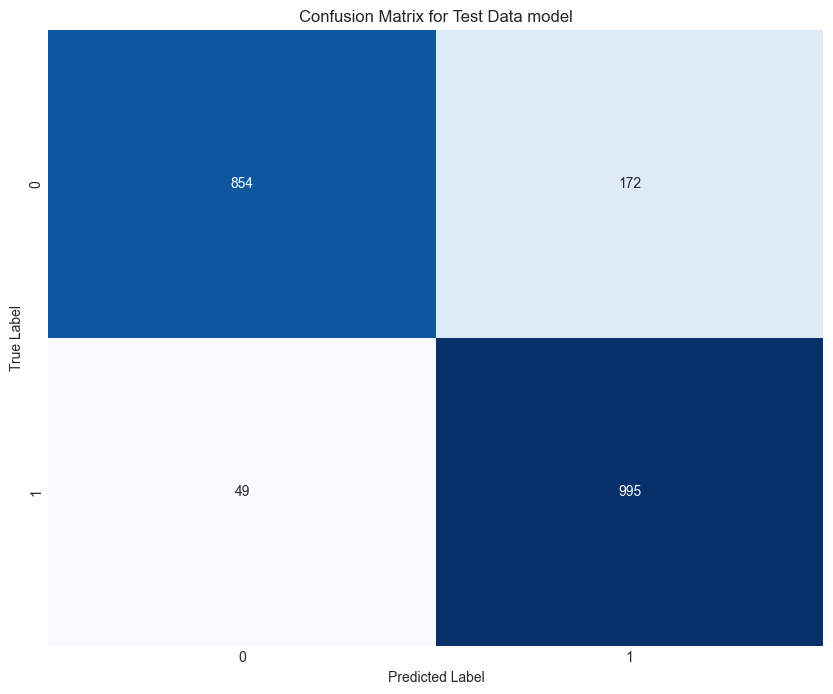

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

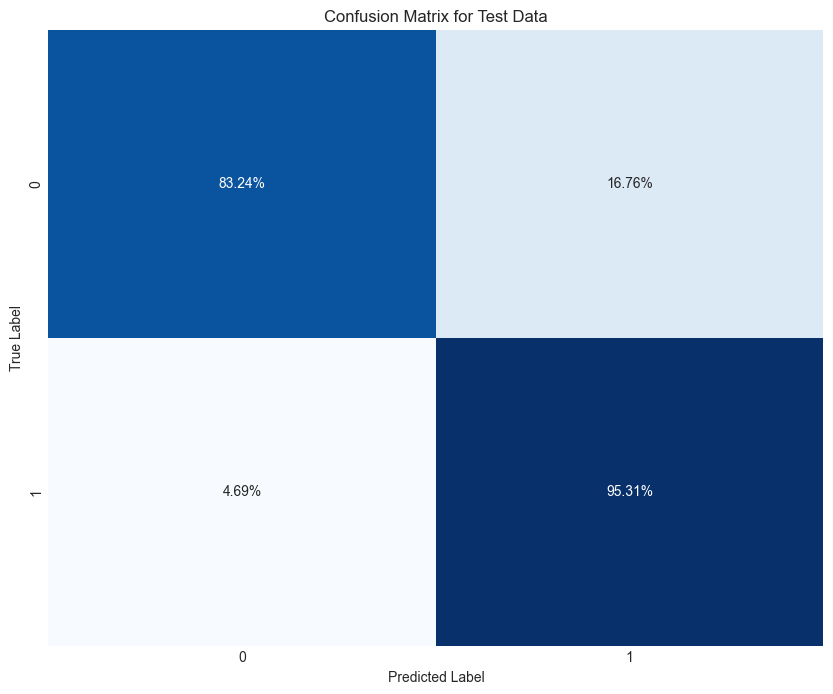

In [14]:
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix with percentages
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2%", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

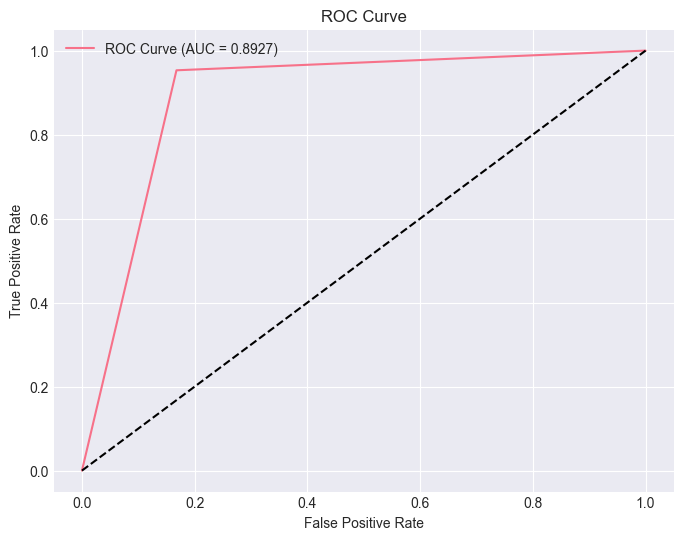

In [24]:
roc_auc = roc_auc_score(y_test, y_pred_test)

fpr, tpr, _ = roc_curve(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()



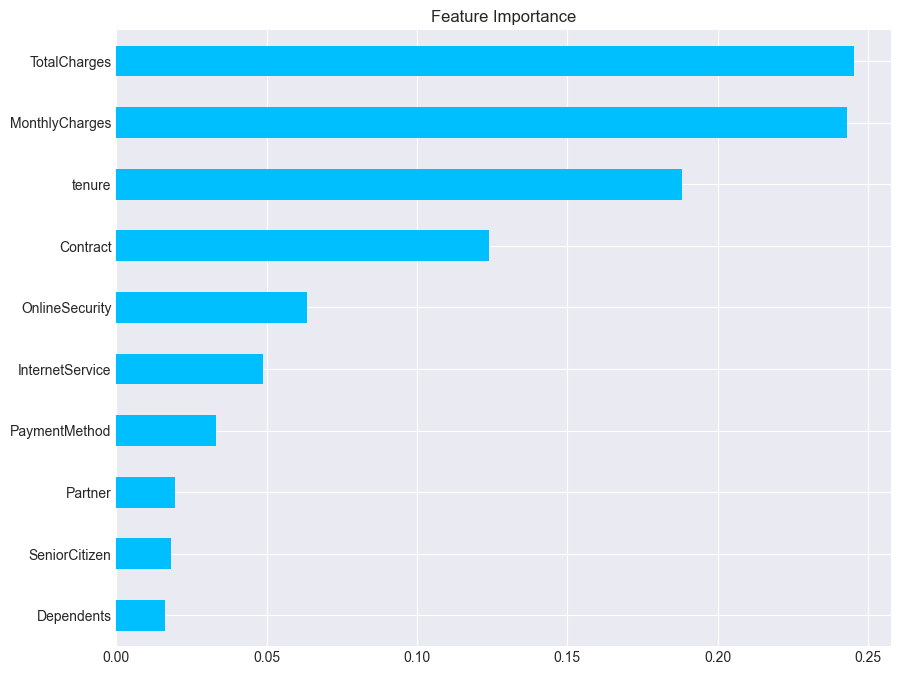

In [35]:
coefficients = rf_classifier.feature_importances_
feature_importance = pd.Series(coefficients, index=X.columns)
feature_importance.sort_values().plot(kind='barh', color='deepskyblue', figsize=(10, 8))
plt.title("Feature Importance")
plt.show()

In [16]:
evaluate_model(y_test, y_pred_test)

Accuracy: 0.893
Precision: 0.893
Recall: 0.893
F1-score: 0.893


In [17]:
joblib.dump(rf_classifier, "model.pkl")

['model.pkl']